In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Transformation and Exploration.


This assignment asks you to predict readmission for diabetic patients admitted to hospital, i.e., what is the likelihood that a patient will need to come back to hospital given the data about this visit. 
This is based on a database of 101766 hospital visits with a set of 50 features covering patient information, treatment and prescribed medication during the hospital stay.
The database covers patients admitted to 130 hospitals in the US over a period of 10 years to 2008. The original data came from this source:

We decided to drop the following variables:

    'encounter_id',
    'patient_nbr',
    'payer_code',
    'medical_specialty',
    'weight',
    
For the time being, we remove the 2% missing values for "race" (which we could later inpute using clustering tecniques)

Intuitively, we can assume that all these datapoints have no incidence on the readmission because they are either abstract values arbitrarily set by humans (e.g. patinet_nbr) OR not directly related to the outcome of "readmission (e.g. "admission_source_id").

    We have decided to keep 1)'admission_type_id' and 2)'discharge_disposition_id' though they could have been droped because 
    
    1) We assume that different hospitals are exhibiting different levels of healthcare services (some better than others) 
    
    2) We assume that being sent back home can exhibit higher chances of readmission than being transfered to another hospital, in which patients are constantly monitored. 


In [5]:
df_train = pd.read_csv("Dataset/diabetic_data_training.csv")
df_test = pd.read_csv('Dataset/diabetic_data_test.csv')

# print(df_train.head(5))
# print(df_test.head(5))

df_train.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
5,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
7,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,36900,77391171,AfricanAmerican,Male,[60-70),?,2,1,4,7,...,No,Steady,No,No,No,No,No,Ch,Yes,<30


We assigned textual values to the numerical placeholders in the dataset communicated as we might perform some NLP

In [6]:
mapping_csv = pd.read_csv("Dataset/IDS_mapping.csv")
mapping_csv = mapping_csv.dropna(how='all')
dictionaries = {}
current_dict = 'admission_type_id'
dictionaries[current_dict] = {}


for index, row in mapping_csv.iterrows():
   id = row.to_list()[0]
   if id.isdigit():
       dictionaries[current_dict][row.to_list()[0]] = str(row.to_list()[1])
   else:
       current_dict = id
       dictionaries[current_dict] = {}

In [7]:
# Mapping the textual values associated with teh placeholder values given originally in teh dataset

# TRAIN DATA

if 'admission_type_id' in df_train.columns:
   df_train['admission_type_id'] = df_train['admission_type_id'].astype(str).map(dictionaries['admission_type_id'])


# Map discharge dispositions
if 'discharge_disposition_id' in df_train.columns:
   df_train['discharge_disposition_id'] = df_train['discharge_disposition_id'].astype(str).map(dictionaries['discharge_disposition_id'])


if 'admission_source_id' in df_train.columns:
   df_train['admission_source_id'] = df_train['admission_source_id'].astype(str).map(dictionaries['admission_source_id'])
   
# TEST DATA

if 'admission_type_id' in df_test.columns:
   df_test['admission_type_id'] = df_test['admission_type_id'].astype(str).map(dictionaries['admission_type_id'])


# Map discharge dispositions
if 'discharge_disposition_id' in df_test.columns:
   df_test['discharge_disposition_id'] = df_test['discharge_disposition_id'].astype(str).map(dictionaries['discharge_disposition_id'])


if 'admission_source_id' in df_test.columns:
   df_test['admission_source_id'] = df_test['admission_source_id'].astype(str).map(dictionaries['admission_source_id'])
   


df_train.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),?,Emergency,Discharged to home,Emergency Room,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),?,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),?,Emergency,Discharged to home,Emergency Room,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),?,Emergency,Discharged to home,Emergency Room,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),?,Urgent,Discharged to home,Clinic Referral,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
5,55842,84259809,Caucasian,Male,[60-70),?,Elective,Discharged to home,Clinic Referral,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,63768,114882984,Caucasian,Male,[70-80),?,Emergency,Discharged to home,Emergency Room,5,...,No,No,No,No,No,No,No,No,Yes,>30
7,12522,48330783,Caucasian,Female,[80-90),?,Urgent,Discharged to home,Transfer from a hospital,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,15738,63555939,Caucasian,Female,[90-100),?,Elective,Discharged/transferred to SNF,Transfer from a hospital,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,36900,77391171,AfricanAmerican,Male,[60-70),?,Urgent,Discharged to home,Transfer from a hospital,7,...,No,Steady,No,No,No,No,No,Ch,Yes,<30


In [8]:
# df_train.shape

In [9]:
# Columns to drop
features_to_drop = ['encounter_id', 'patient_nbr', 'payer_code', 'medical_specialty', 'weight']

print(df_train.columns)

print("Number of columns in df_train before dropping:", len(df_train.columns))

# # Drop columns directly from both dataframes
df_train = df_train.drop(columns=features_to_drop, axis=1)
df_test = df_test.drop(columns=features_to_drop, axis=1)

# Print the number of columns remaining
print("Number of columns in df_train after dropping:", len(df_train.columns))

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Number of columns in df_train before dropping: 50
Number of columns i

In [10]:
# This replaces all the question marks with NaN

df_train = df_train.replace('?', pd.NA)
df_test = df_test.replace('?', pd.NA)

df_train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),Urgent,Discharged to home,Clinic Referral,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [11]:
# Replace None or 'none' values in the specified columns with the desired text
df_train['max_glu_serum'] = df_train['max_glu_serum'].replace(
    [None, 'none'], "The test was not conducted on this patient"
)
df_train['A1Cresult'] = df_train['A1Cresult'].replace(
    [None, 'none'], "The test was not conducted on this patient"
)

# Print confirmation
print("Replacement completed for 'max_glu_serum' and 'A1Cresult'.")

Replacement completed for 'max_glu_serum' and 'A1Cresult'.


In [12]:
# Checking for Missing Values and Printing Only Features with Missing Values
missing_values = df_train.isnull().sum()

# Filter for features with missing values
missing_features = missing_values[missing_values > 0]

# Print the features with missing values
print("\nFeatures with Missing Values:")
print(missing_features)


Features with Missing Values:
race      2059
diag_1      21
diag_2     320
diag_3    1266
dtype: int64


As we can see, two of our dataset features have a large number of missing values. 

These are:

max_glu_serum: Indicates the range of the result or if the test was not taken. Values: >200, >300, normal, and none if not measured.

A1Cresult: Indicates the range of the result or if the test was not taken. Values: >8 if the result was greater than 8%, >7 if the result was greater than 7% but less than 8%, normal if the result was less than 7%, and none if not measured.

The problem is that these two columns are mixing numerical values with categorical ones. COULD WE POTENTIALLY CONVERT ALL OF THESE INTO STRINGS AND EMBBED THEM? THEN ??


In [13]:
print(df_train.columns)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [14]:
# convert age from categorical to numerical variable
age_mapping = {
       '[0-10)' : 5,
       '[10-20)' : 15,
       '[20-30)' : 25,
       '[30-40)' : 35,
       '[40-50)' : 45,
       '[50-60)' : 55,
       '[60-70)' : 65,
       '[70-80)' : 75,
       '[80-90)' : 85,
       '[90-100)' : 95,
}

df_train['age'] = df_train['age'].map(age_mapping)
df_test['age'] = df_test['age'].map(age_mapping)



In [15]:
# hot-one encoding of all our categorical variables. 

categorical_columns = [
    'race', 'gender', 'max_glu_serum', 'A1Cresult', 'metformin', 
    'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
    'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 
    'glipizide-metformin', 'glimepiride-pioglitazone', 
    'metformin-rosiglitazone', 'metformin-pioglitazone', 
    'change', 'diabetesMed', 
] # 'readmitted' if you want to have a 3-output classification instead of tradi ,multinomial

df_train_cat = pd.get_dummies(df_train[categorical_columns+ ['admission_type_id','discharge_disposition_id','admission_source_id']],drop_first=False) # we set drop_first=False because our readmission column takes three values which requires creating three columns
df_test_cat = pd.get_dummies(df_test[categorical_columns+ ['admission_type_id','discharge_disposition_id','admission_source_id']],drop_first=False) # we set drop_first=False because our readmission column takes three values which requires creating three columns


In [16]:
# Select numerical columns for df_train
df_train_num = df_train[['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                         'num_medications', 'number_outpatient', 'number_emergency',
                         'number_inpatient', 'number_diagnoses']]

# Select numerical columns for df_test
df_test_num = df_test[['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                       'num_medications', 'number_outpatient', 'number_emergency',
                       'number_inpatient', 'number_diagnoses']]

In [17]:
# Now, we concatenate all types of variables together
df_train_concat = pd.concat([df_train_num, df_train_cat, df_train['age'], df_train["readmitted"]], axis = 1)
df_test_concat = pd.concat([df_test_num, df_test_cat, df_test['age'], df_test["readmitted"]], axis = 1)

#CAT
print(len(df_train_cat.columns))
print(len(df_test_cat.columns))


display(df_train_concat,df_test_concat)

137
119


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,admission_source_id_ Transfer from another health care facility,admission_source_id_ Transfer from critial access hospital,admission_source_id_ Transfer from hospital inpt/same fac reslt in a sep claim,admission_source_id_Clinic Referral,admission_source_id_HMO Referral,admission_source_id_Normal Delivery,admission_source_id_Transfer from a hospital,admission_source_id_nan,age,readmitted
0,3,59,0,18,0,0,0,9,False,False,...,False,False,False,False,False,False,False,False,15,>30
1,2,11,5,13,2,0,1,6,True,False,...,False,False,False,False,False,False,False,False,25,NO
2,2,44,1,16,0,0,0,7,False,False,...,False,False,False,False,False,False,False,False,35,NO
3,1,51,0,8,0,0,0,5,False,False,...,False,False,False,False,False,False,False,False,45,NO
4,3,31,6,16,0,0,0,9,False,False,...,False,False,False,True,False,False,False,False,55,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91584,3,51,0,16,0,0,0,9,True,False,...,False,False,False,False,False,False,False,False,75,>30
91585,5,33,3,18,0,0,1,9,True,False,...,False,False,False,False,False,False,False,False,85,NO
91586,1,53,0,9,1,0,0,13,False,False,...,False,False,False,False,False,False,False,False,75,NO
91587,10,45,2,21,0,0,1,9,False,False,...,False,False,False,False,False,False,False,False,85,NO


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,admission_source_id_ Physician Referral,admission_source_id_ Transfer from a Skilled Nursing Facility (SNF),admission_source_id_ Transfer from another health care facility,admission_source_id_Clinic Referral,admission_source_id_HMO Referral,admission_source_id_Normal Delivery,admission_source_id_Transfer from a hospital,admission_source_id_nan,age,readmitted
0,1,41,0,1,0,0,0,1,False,False,...,True,False,False,False,False,False,False,False,5,NO
1,9,47,2,17,0,0,0,9,True,False,...,False,False,False,False,False,False,False,False,45,>30
2,2,66,1,19,0,0,0,7,False,False,...,False,False,False,False,False,False,True,False,55,NO
3,6,87,0,18,0,0,0,9,True,False,...,False,False,False,False,False,False,False,False,65,NO
4,1,28,0,15,0,0,0,4,False,False,...,False,False,False,False,False,False,False,False,75,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10172,5,71,5,23,0,0,0,9,False,False,...,False,False,False,False,False,False,False,False,55,>30
10173,3,57,4,11,0,0,1,9,True,False,...,False,False,False,False,False,False,False,False,75,NO
10174,1,1,5,8,0,0,0,4,False,False,...,True,False,False,False,False,False,False,False,45,NO
10175,3,31,2,24,0,0,0,9,False,False,...,True,False,False,False,False,False,False,False,85,<30


As we can see, our train and test data frames have different lengths (number of cols), this is because we have one-hot encoded everything and the values taken by certain columns were different in the train and test sets. This comes from the given test set itself, which does not contain as many different observations that the train set. When testing our model we'll have to set all columns present in the train set but not test set equal to 0 since they cannot be tested. (natral imbalance...)

In [18]:
# We still have some non-numerical binary values which we need to replace by zeros and ones. For all columns in the dataset, make sure that Yes, True are replaced by 1 and that No, False are replaced by 0. 

df_train_concat = df_train_concat.replace({'Yes': 1, 'No': 0, True: 1, False: 0})
df_test_concat = df_test_concat.replace({"yes":1, "No":0, True:1, False:0})

display(df_train_concat.head(), df_test_concat.head())


/var/folders/9v/91ylsyks64x80_d2p3zkltzc0000gn/T/ipykernel_88994/2444131920.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train_concat = df_train_concat.replace({'Yes': 1, 'No': 0, True: 1, False: 0})
/var/folders/9v/91ylsyks64x80_d2p3zkltzc0000gn/T/ipykernel_88994/2444131920.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_concat = df_test_concat.replace({"yes":1, "No":0, True:1, False:0})


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,admission_source_id_ Transfer from another health care facility,admission_source_id_ Transfer from critial access hospital,admission_source_id_ Transfer from hospital inpt/same fac reslt in a sep claim,admission_source_id_Clinic Referral,admission_source_id_HMO Referral,admission_source_id_Normal Delivery,admission_source_id_Transfer from a hospital,admission_source_id_nan,age,readmitted
0,3,59,0,18,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,15,>30
1,2,11,5,13,2,0,1,6,1,0,...,0,0,0,0,0,0,0,0,25,NO
2,2,44,1,16,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,35,NO
3,1,51,0,8,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,45,NO
4,3,31,6,16,0,0,0,9,0,0,...,0,0,0,1,0,0,0,0,55,>30


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,admission_source_id_ Physician Referral,admission_source_id_ Transfer from a Skilled Nursing Facility (SNF),admission_source_id_ Transfer from another health care facility,admission_source_id_Clinic Referral,admission_source_id_HMO Referral,admission_source_id_Normal Delivery,admission_source_id_Transfer from a hospital,admission_source_id_nan,age,readmitted
0,1,41,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,5,NO
1,9,47,2,17,0,0,0,9,1,0,...,0,0,0,0,0,0,0,0,45,>30
2,2,66,1,19,0,0,0,7,0,0,...,0,0,0,0,0,0,1,0,55,NO
3,6,87,0,18,0,0,0,9,1,0,...,0,0,0,0,0,0,0,0,65,NO
4,1,28,0,15,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,75,>30


In [19]:
# finally, let's make sure we got rid of all non-numerical values except the target var. 
non_numerical_columns_train = df_train_concat.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numerical columns:", non_numerical_columns_train)

non_numerical_columns_test = df_train_concat.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numerical columns:", non_numerical_columns_test)


Non-numerical columns: ['readmitted']
Non-numerical columns: ['readmitted']


Applying Chi-Square Test...


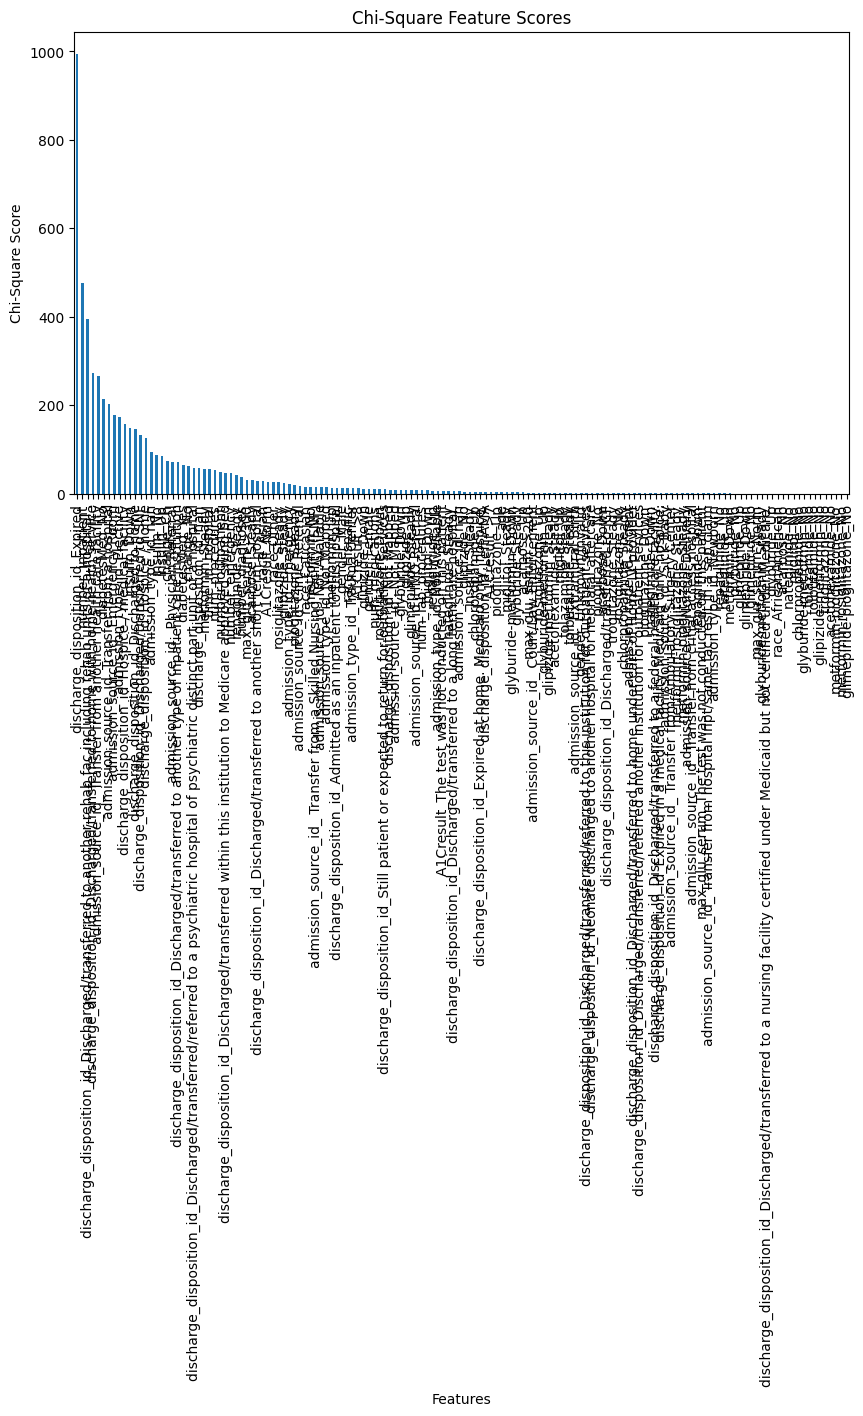

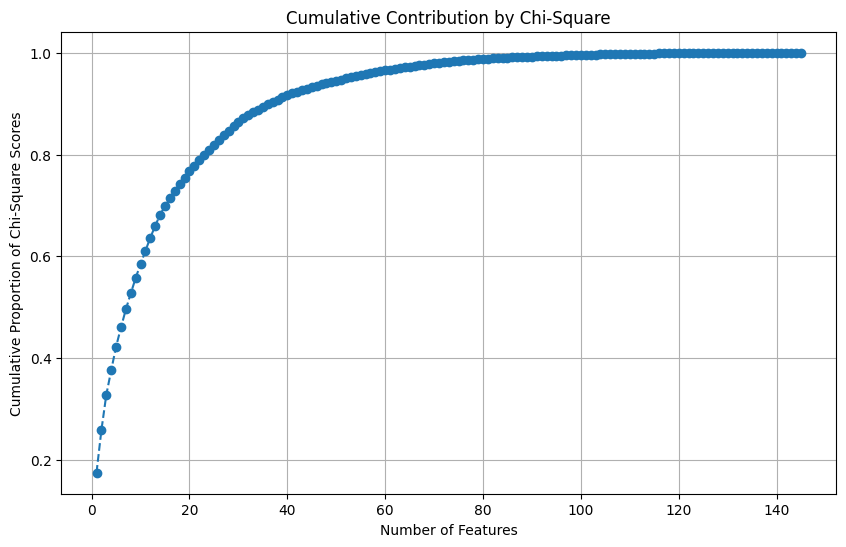

Optimal number of features to retain from Chi-Square: 84
Top 84 features selected by Chi-Square:
 ['discharge_disposition_id_Expired', 'number_inpatient', 'discharge_disposition_id_Discharged/transferred to another rehab fac including rehab units of a hospital .', 'discharge_disposition_id_Discharged/transferred to home with home health service', 'admission_source_id_ Transfer from another health care facility', 'diabetesMed_No', 'admission_source_id_Transfer from a hospital', 'admission_source_id_ Emergency Room', 'admission_type_id_Elective', 'discharge_disposition_id_Hospice / medical facility', 'insulin_Down', 'discharge_disposition_id_Discharged to home', 'discharge_disposition_id_Discharged/transferred to SNF', 'discharge_disposition_id_Hospice / home', 'admission_type_id_nan', 'insulin_No', 'insulin_Up', 'change_Ch', 'admission_source_id_ Physician Referral', 'discharge_disposition_id_Discharged/transferred to another type of inpatient care institution', 'diabetesMed_Yes', 'chan

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


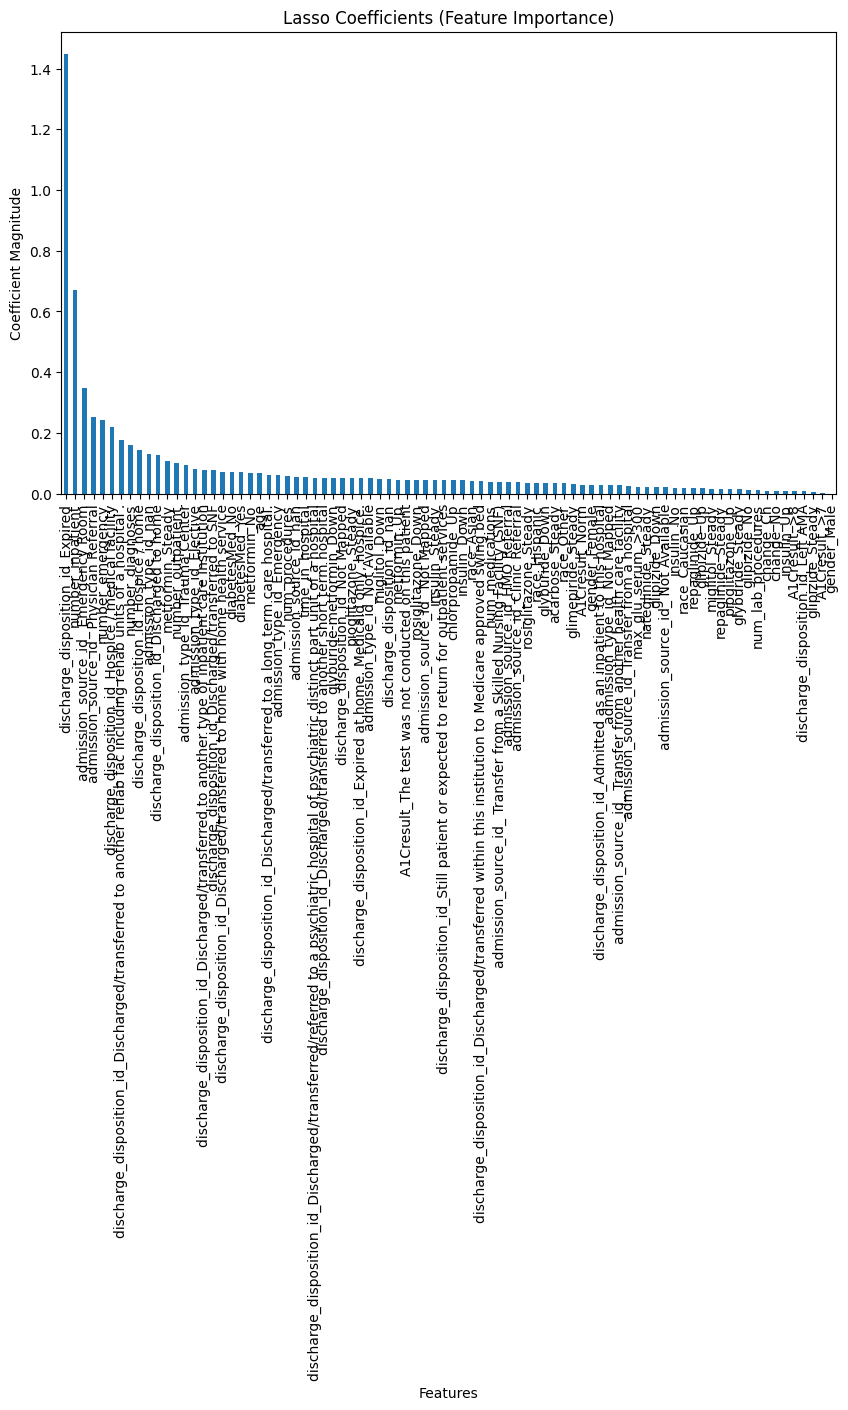

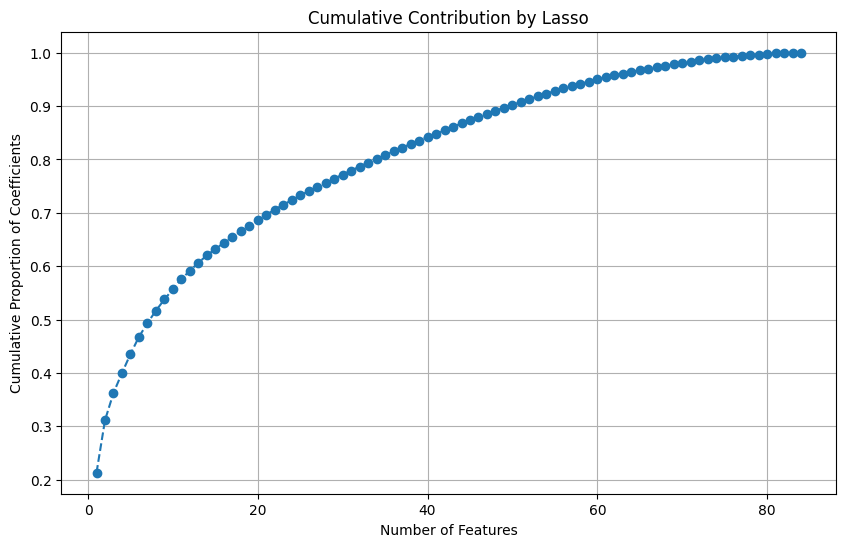

Optimal number of features to retain from Lasso: 75
Top 75 features selected by Lasso:
 ['discharge_disposition_id_Expired', 'number_inpatient', 'admission_source_id_ Emergency Room', 'admission_source_id_ Physician Referral', 'number_emergency', 'discharge_disposition_id_Hospice / medical facility', 'discharge_disposition_id_Discharged/transferred to another rehab fac including rehab units of a hospital .', 'number_diagnoses', 'discharge_disposition_id_Hospice / home', 'admission_type_id_nan', 'discharge_disposition_id_Discharged to home', 'metformin_Steady', 'number_outpatient', 'admission_type_id_Trauma Center', 'admission_type_id_Elective', 'discharge_disposition_id_Discharged/transferred to another type of inpatient care institution', 'discharge_disposition_id_Discharged/transferred to SNF', 'discharge_disposition_id_Discharged/transferred to home with home health service', 'diabetesMed_No', 'diabetesMed_Yes', 'metformin_No', 'age', 'discharge_disposition_id_Discharged/transferred

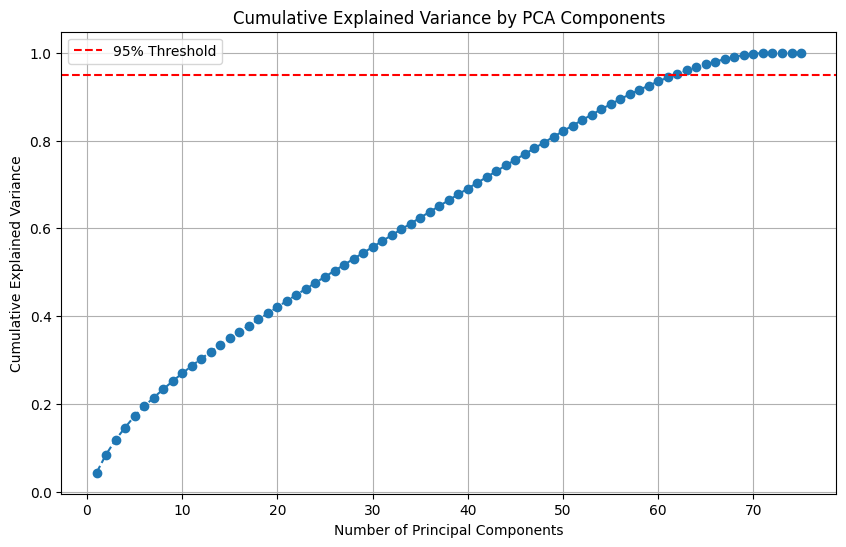

Optimal number of PCA components to retain: 68
Data ready for training:
X_train_final shape: (73271, 68)
X_test_final shape: (18318, 68)


In [20]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Step 1: Split Dataset into Features and Target
X = df_train_concat.drop(columns=['readmitted'])  # Features
y = df_train_concat['readmitted']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Encode the Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts categorical target to numeric

# Step 3: Min-Max Scaling for Chi-Square
minmax_scaler = MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

# Step 4: Chi-Square Test
print("Applying Chi-Square Test...")
chi2_selector = SelectKBest(score_func=chi2, k='all')  # Use 'all' to get scores for all features
chi2_selector.fit(X_train_minmax_scaled, y_train_encoded)

# Chi-Square scores and plot
chi2_scores = pd.Series(chi2_selector.scores_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
chi2_scores.plot(kind='bar', title="Chi-Square Feature Scores")
plt.xlabel("Features")
plt.ylabel("Chi-Square Score")
plt.show()

# Cumulative explained contribution (Chi-Square)
cumulative_scores_chi2 = np.cumsum(chi2_scores) / chi2_scores.sum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_scores_chi2) + 1), cumulative_scores_chi2, marker='o', linestyle='--')
plt.title('Cumulative Contribution by Chi-Square')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Proportion of Chi-Square Scores')
plt.grid()
plt.show()

# Optimal number of features from Chi-Square
desired_contribution = 0.99
optimal_k_chi2 = np.argmax(cumulative_scores_chi2 >= desired_contribution) + 1
print(f"Optimal number of features to retain from Chi-Square: {optimal_k_chi2}")

top_features_chi2 = chi2_scores.head(optimal_k_chi2).index.tolist()
print(f"Top {optimal_k_chi2} features selected by Chi-Square:\n", top_features_chi2)

# Reduce dataset to Chi-Square selected features
X_train_chi2_selected = pd.DataFrame(X_train_minmax_scaled, columns=X_train.columns)[top_features_chi2]
X_test_chi2_selected = pd.DataFrame(X_test_minmax_scaled, columns=X_test.columns)[top_features_chi2]

# Step 5: Lasso Feature Selection
print("Applying Lasso for Feature Selection...")
standard_scaler = StandardScaler()
X_train_lasso_scaled = standard_scaler.fit_transform(X_train_chi2_selected)
X_test_lasso_scaled = standard_scaler.transform(X_test_chi2_selected)

lasso = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=1000, random_state=42)
lasso.fit(X_train_lasso_scaled, y_train_encoded)

lasso_coefficients = pd.Series(np.abs(lasso.coef_).sum(axis=0), index=X_train_chi2_selected.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
lasso_coefficients.plot(kind='bar', title="Lasso Coefficients (Feature Importance)")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.show()

# Cumulative explained contribution (Lasso)
cumulative_scores_lasso = np.cumsum(lasso_coefficients) / lasso_coefficients.sum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_scores_lasso) + 1), cumulative_scores_lasso, marker='o', linestyle='--')
plt.title('Cumulative Contribution by Lasso')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Proportion of Coefficients')
plt.grid()
plt.show()

# Optimal number of features from Lasso
optimal_k_lasso = np.argmax(cumulative_scores_lasso >= desired_contribution) + 1
print(f"Optimal number of features to retain from Lasso: {optimal_k_lasso}")

top_features_lasso = lasso_coefficients.head(optimal_k_lasso).index.tolist()
print(f"Top {optimal_k_lasso} features selected by Lasso:\n", top_features_lasso)

# Reduce dataset to Lasso selected features
X_train_lasso_selected = pd.DataFrame(X_train_lasso_scaled, columns=X_train_chi2_selected.columns)[top_features_lasso]
X_test_lasso_selected = pd.DataFrame(X_test_lasso_scaled, columns=X_test_chi2_selected.columns)[top_features_lasso]

# Step 6: PCA
print("Applying PCA...")
pca = PCA()
X_train_pca = pca.fit_transform(X_train_lasso_selected)
X_test_pca = pca.transform(X_test_lasso_selected)

explained_variance_pca = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_pca) + 1), explained_variance_pca, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.grid()
plt.show()

# Optimal number of PCA components
optimal_k_pca = np.argmax(explained_variance_pca >= desired_contribution) + 1
print(f"Optimal number of PCA components to retain: {optimal_k_pca}")

# Refit PCA with optimal number of components
pca = PCA(n_components=optimal_k_pca)
X_train_final = pca.fit_transform(X_train_lasso_selected)
X_test_final = pca.transform(X_test_lasso_selected)

# Final dataset ready for training
print("Data ready for training:")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

In [18]:
# import the clean data to run models in another notebook: 

import pickle

# Save the data using pickle
with open("train_test_data.pkl", "wb") as f:
    pickle.dump((X_train_final, X_test_final, y_train_encoded, y_test), f)